# Bank Note Authentication

In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [34]:
data=pd.read_csv("C:/Users/hp/Documents/ML Projects/Bank Note Authenticatiion/BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
data.shape

(1372, 5)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [37]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [38]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [39]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

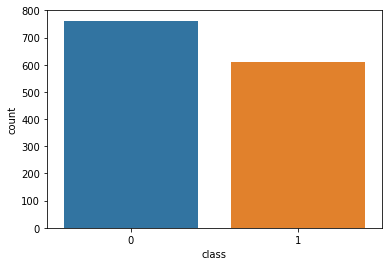

In [40]:
sns.countplot(y)

<function matplotlib.pyplot.show(close=None, block=None)>

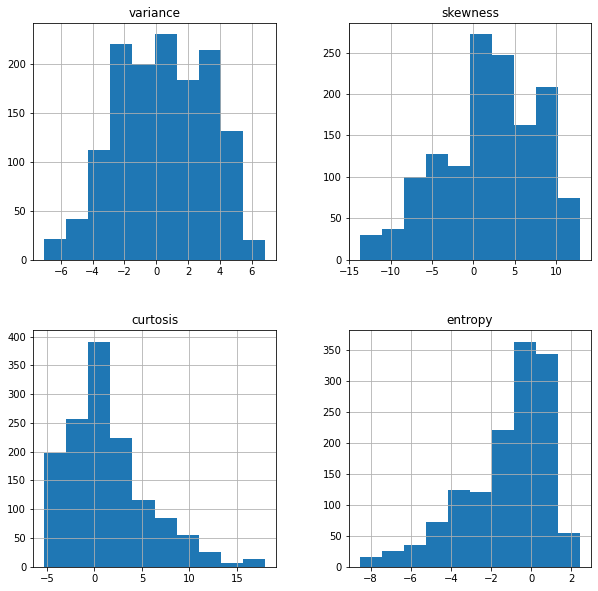

In [41]:
#checking the skewness of data
X.hist(bins=10,figsize=(10,10))
plt.show

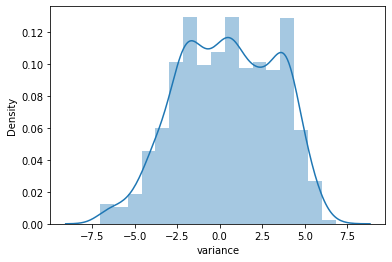

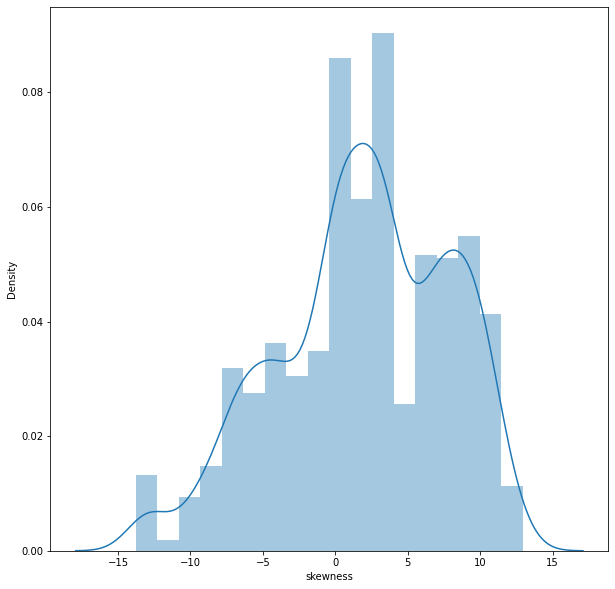

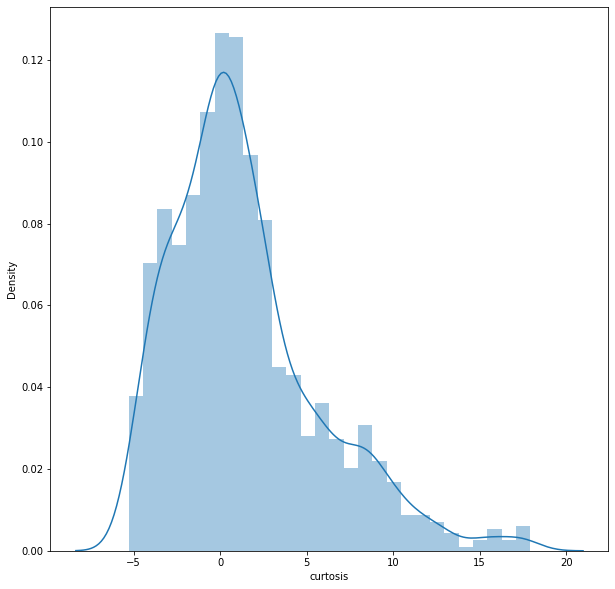

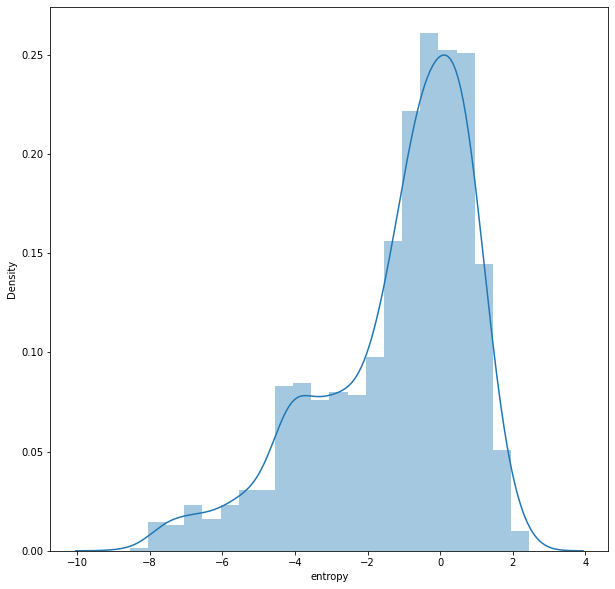

<Figure size 720x720 with 0 Axes>

In [42]:
# distplot of each independent feature
for feature in X.columns:
    sns.distplot(X[feature])
    plt.figure(figsize=(10,10))

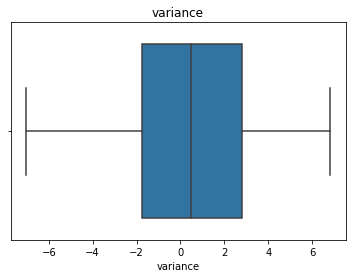

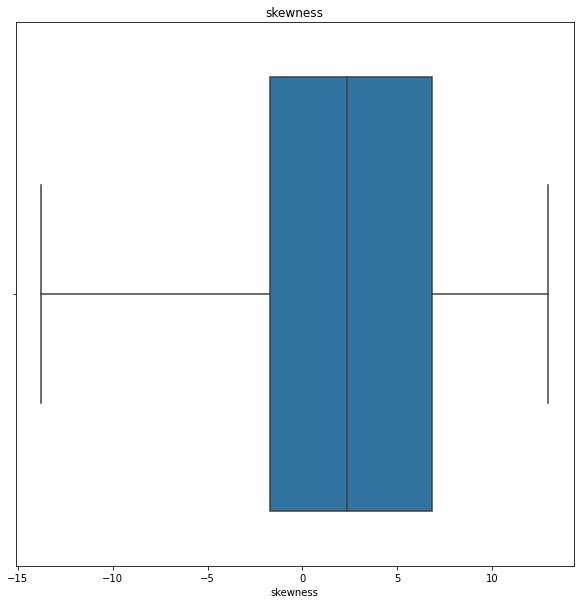

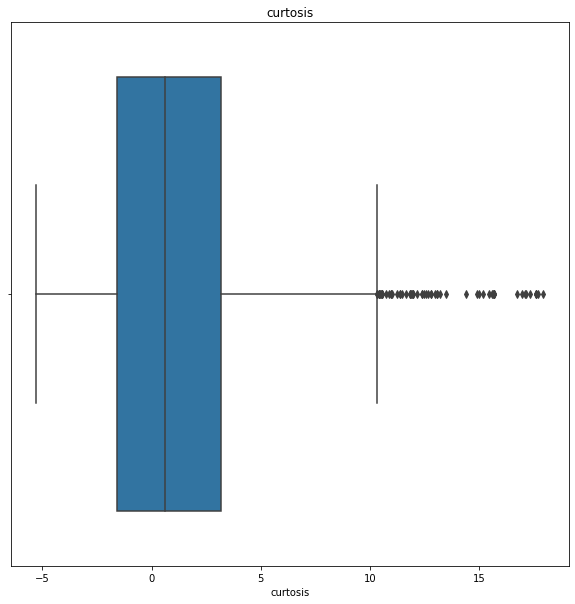

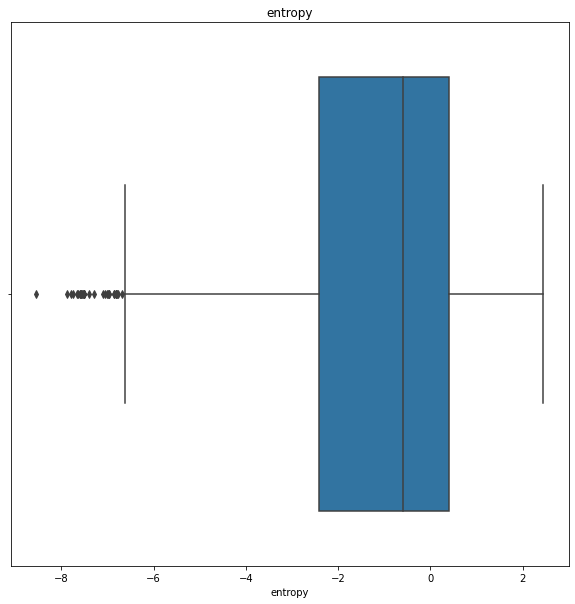

<Figure size 720x720 with 0 Axes>

In [43]:
for feature in X.columns:
    sns.boxplot(X[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

In [44]:
# handling outliers for curtosis and entropy
IQR=X['entropy'].quantile(0.75)-X['entropy'].quantile(0.25)
upper=X['entropy'].quantile(0.75)+(IQR*1.5)
lower=X['entropy'].quantile(0.25)-(IQR*1.5)
print(lower,upper)

-6.62584 4.6072


In [45]:
X.loc[X['entropy']>=4.60,'entropy']=4.60
X.loc[X['entropy']<=-6.62,'entropy']=-6.62

In [46]:
IQR=X['curtosis'].quantile(0.75)-X['curtosis'].quantile(0.25)
upper=X['curtosis'].quantile(0.75)+(IQR*1.5)
lower=X['curtosis'].quantile(0.25)-(IQR*1.5)
print(lower,upper)

-8.7063125 10.3105875


In [47]:
X.loc[X['curtosis']>=10.31,'curtosis']=10.31
X.loc[X['curtosis']<=-8.70,'curtosis']=-8.70

<Figure size 720x720 with 0 Axes>

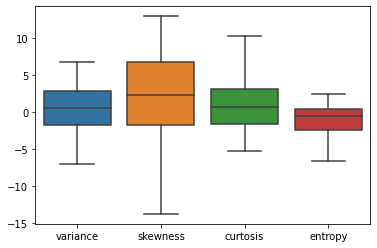

<Figure size 720x720 with 0 Axes>

In [48]:
##after handling outliers
sns.boxplot(data=X)
plt.figure(figsize=(10,10))

In [50]:
## train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
X_train.shape,X_test.shape

((960, 4), (412, 4))

In [55]:
# Training the Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Random Forest Classifier

In [58]:
random=RandomForestClassifier()
random.fit(X_train,y_train)
y_predict=random.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9902912621359223
[[229   3]
 [  1 179]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



LogisticRegression

In [61]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_predict=logistic.predict(X_test)

In [62]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9878640776699029
[[227   5]
 [  0 180]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       232
           1       0.97      1.00      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [64]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

1.0
[[232   0]
 [  0 180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



SVC_Classifier

In [65]:
svc=SVC()
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

In [66]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9975728155339806
[[231   1]
 [  0 180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



DecisionTreeClassifier

In [67]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)

In [68]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9781553398058253
[[226   6]
 [  3 177]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       232
           1       0.97      0.98      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



XGBClassifier

In [69]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_predict=xgb.predict(X_test)

[15:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9951456310679612
[[230   2]
 [  0 180]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       232
           1       0.99      1.00      0.99       180

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Naive Bayes Classifier

In [71]:
naive=GaussianNB()
naive.fit(X_train,y_train)
y_predict=naive.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8398058252427184
[[199  33]
 [ 33 147]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       232
           1       0.82      0.82      0.82       180

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412



In [ ]:
import joblib
joblib.dump(random,'RandomForestClassifier.pkl')
joblib.dump(logistic,'LogisticRegression.pkl')
joblib.dump(knn,'KNeighborsClassifier.pkl')
joblib.dump(svc,'SVC_Classifier.pkl')
joblib.dump(dtree,'DecisionTreeClassifier.pkl')
joblib.dump(random,'XGBClassifier.pkl')